In [68]:
import requests
import pandas as pd

# API 
API_KEY = 'b6b9d811f43f05fc066c564cb0223db6'
cities = ['London', 'New York', 'Tokyo', 'Jakarta', 'Paris', 'Berlin']

# Get weather data
def get_weather(city):
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric'
    response = requests.get(url)
    return response.json()

weather_data = []
for city in cities:
    data = get_weather(city)
    weather_data.append({
        'City': city,
        'Temperature': data['main']['temp'],
        'Humadity': data['main']['humidity'],
        'Weather': data['weather'][0]['description']
    })

# Save to CSV
df = pd.DataFrame(weather_data)
df.to_csv('weather.csv', index=False)


In [51]:
# EDA
print(df.head())
df.describe()

       City  Temperature  Humadity           Weather
0    London        17.68        84   overcast clouds
1  New York        15.70        77  scattered clouds
2     Tokyo        21.31        79     broken clouds
3   Jakarta        29.98        70              haze
4     Paris        18.47        69     broken clouds


,Temperature,Humadity
count,6.000000,6.000000
mean,21.375000,71.500000
std,5.334757,11.945711
min,15.700000,50.000000
25%,17.877500,69.250000
50%,19.890000,73.500000
75%,24.160000,78.500000
max,29.980000,84.000000


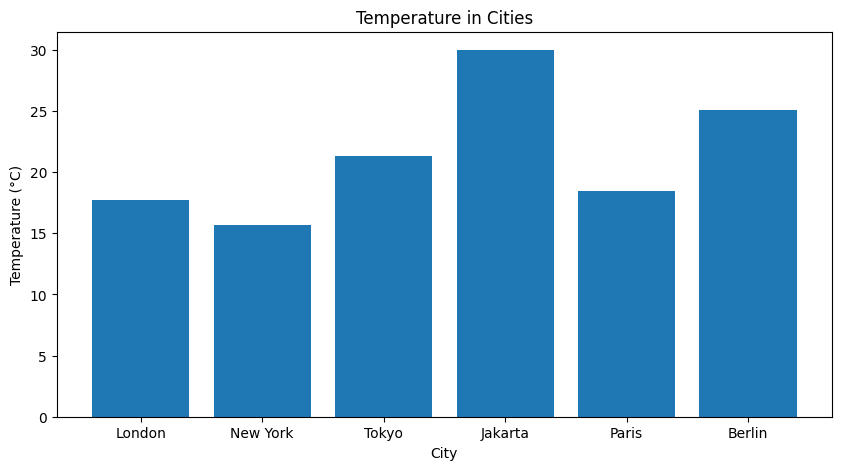

Max Temperature: 29.98°C
Min Temperature: 15.7°C
Avg Temperature: 21.375°C
City with highest temperature is ['Jakarta'] with 29.98°C
City with lowest temperature is ['New York'] with 15.7°C
Most of the weather is broken clouds


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV
df = pd.read_csv('weather.csv')

# Visualize
plt.figure(figsize=(10, 5))
plt.bar(df['City'], df['Temperature'])
plt.title('Temperature in Cities')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.show()

# Max Temperature
max_temp = df['Temperature'].max()
print(f'Max Temperature: {max_temp}°C')

# Lowest Temperature
min_temp = df['Temperature'].min()
print(f'Min Temperature: {min_temp}°C')

# Avg Temperature
avg_temp = df['Temperature'].mean()
print(f'Avg Temperature: {avg_temp}°C')

# Cities with highest temperature
max_temp_city = df[df['Temperature'] == max_temp]['City'].values
print(f'City with highest temperature is {max_temp_city} with {max_temp}°C')

# Cities with lowest temperature
min_temp_city = df[df['Temperature'] == min_temp]['City'].values    
print(f'City with lowest temperature is {min_temp_city} with {min_temp}°C')

# Most weather
most_weather = df['Weather'].value_counts().idxmax()
print(f'Most of the weather is {most_weather}')


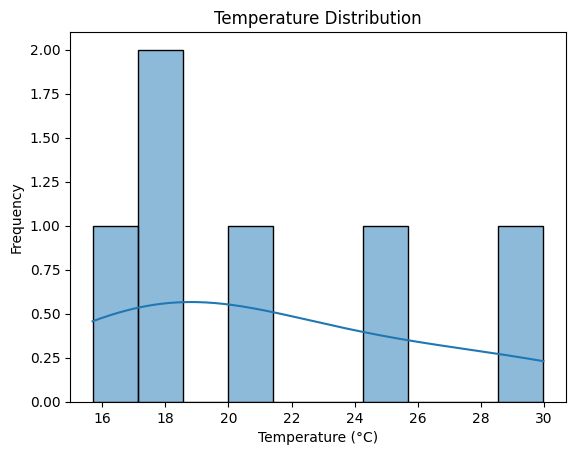

Data city dan temperature:
       City  Temperature
0    London        17.68
1  New York        15.70
2     Tokyo        21.31
3   Jakarta        29.98
4     Paris        18.47
5    Berlin        25.11


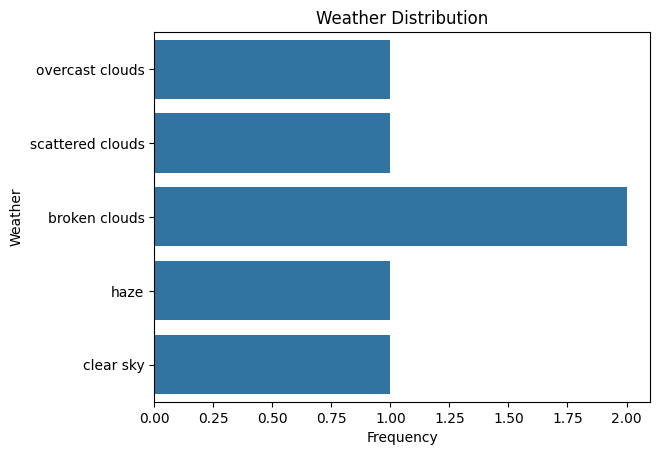

Data city dan weather:
       City           Weather
0    London   overcast clouds
1  New York  scattered clouds
2     Tokyo     broken clouds
3   Jakarta              haze
4     Paris     broken clouds
5    Berlin         clear sky


In [63]:
# Visualize Data
# Visualize Temperature Distribution
sns.histplot(df['Temperature'], bins=10, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

print("Data city dan temperature:")
print(df[['City', 'Temperature']])

# Visualize Weather Distribution
sns.countplot(y='Weather', data=df)
plt.title('Weather Distribution')
plt.xlabel('Frequency')
plt.ylabel('Weather')
plt.show()

print('Data city dan weather:')
print(df[['City','Weather']])